<a href="https://colab.research.google.com/github/Cynthia3992/DeepLearning_Columbia/blob/master/assignment2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The code in this notebook should work identically between TF v1 and v2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras import applications
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Accuracy and Validation Plot function

def plt_acc(history, pfx = ''):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, EPOCHS+1)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(pfx + ' Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(pfx + ' Training and Validation Loss')
  plt.show()

## Part 1

1) Download the mini-flowers dataset. This contains 1,500 images of five different types of flowers. Modify one of the above notebooks to classify these images using transfer learning. How accurate of a model can you train? 

2) Next, run experiments using at least two pretrained convolutional bases (​applications​), and compare your results. Include a short, informal write-up (using bullet points is fine). What differences do you see, and why? Read the associated papers to learn more about the networks you’re using, linked from the API doc.


In [3]:
## load data fom google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
base_dir = '/content/drive/My Drive/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

In [6]:
print(len(os.listdir(val_daisy_dir)))
print(len(os.listdir(val_dandelion_dir))) 
print(len(os.listdir(val_roses_dir))) 
print(len(os.listdir(val_sunflowers_dir)))
print(len(os.listdir(val_tulips_dir)))

100
100
100
100
100


In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [8]:
CLASS_MODE = 'categorical'
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

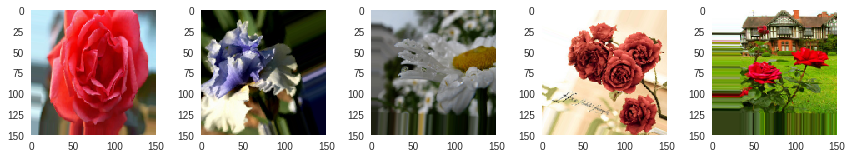

In [11]:
plotImages(sample_training_images[:5])

## Build and Train the model

In [0]:
EPOCHS = 50

In [13]:
conv_base = applications.VGG16(weights='imagenet',include_top=False, 
                               input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
32/32 [==============================] - 451s 14s/step - loss: 1.6203 - acc: 0.5140 - val_loss: 0.7359 - val_acc: 0.7320
Epoch 2/50
32/32 [==============================] - 10s 310ms/step - loss: 0.7362 - acc: 0.7180 - val_loss: 0.7375 - val_acc: 0.7180
Epoch 3/50
32/32 [==============================] - 11s 339ms/step - loss: 0.6963 - acc: 0.7490 - val_loss: 0.6169 - val_acc: 0.7920
Epoch 4/50
32/32 [==============================] - 12s 361ms/step - loss: 0.6004 - acc: 0.7880 - val_loss: 0.7426 - val_acc: 0.7200
Epoch 5/50
32/32 [==============================] - 12s 363ms/step - loss: 0.5879 - acc: 0.7660 - val_loss: 0.6739 - val_acc: 0.7940
Epoch 6/50
32/32 [==============================] - 11s 358ms/step - loss: 0.5207 - acc: 0.7900 - val_loss: 0.6382 - val_acc: 0.7700
Epoch 7/50
32/32 [

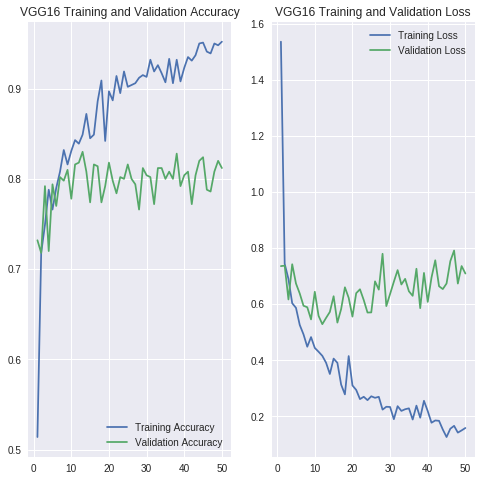

In [14]:
 plt_acc(history, pfx = 'VGG16')

In [15]:
conv_base = applications.ResNet50(weights='imagenet',include_top=False, 
                                  input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Epoch 1/50
32/32 [==============================] - 14s 444ms/step - loss: 8.6133 - acc: 0.4280 - val_loss: 10.3645 - val_acc: 0.2140
Epoch 2/50
32/32 [==============================] - 11s 354ms/step - loss: 6.9651 - acc: 0.5650 - val_loss: 11.1002 - val_acc: 0.2040
Epoch 3/50
32/32 [==============================] - 11s 355ms/step - loss: 7.1634 - acc: 0.5460 - val_loss: 11.1309 - val_acc: 0.2160
Epoch 4/50
32/32 [==============================] - 12s 360ms/step - loss: 6.8845 - acc: 0.5570 - val_loss: 12.7891 - val_acc: 0.1980
Epoch 5/50
32/32 [==============================] - 11s 358ms/step - loss: 6.6077 - acc: 0.5770 - val_loss: 12.8945 - val_acc: 0.2000
Epoch 6/50
32/32 [==============================] - 11s 356ms/step - loss: 7.0260 - acc: 0.5540 - val_loss: 12.8299 - val_acc: 0.2000
Epoch 7/50
32/32 [==============================] - 12s 363ms/step - loss: 5.8208 - acc: 0.6340 - val_loss: 12.9034 - val_acc: 0.20

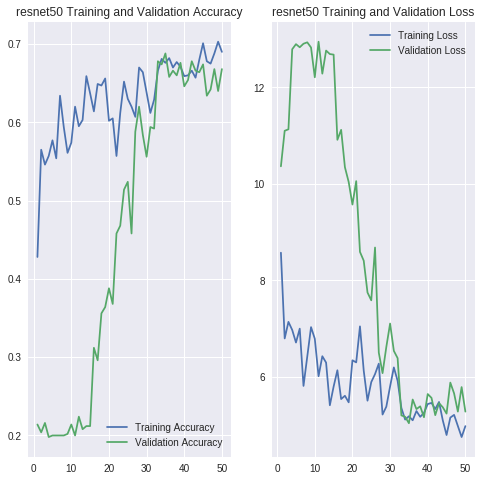

In [16]:
 plt_acc(history, pfx = 'resnet50')

In [17]:
conv_base = applications.InceptionV3(weights='imagenet',include_top=False,
                                     input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

87916544/87910968 [==============================] - 2s 0us/step
Epoch 1/50
32/32 [==============================] - 14s 439ms/step - loss: 6.0460 - acc: 0.3750 - val_loss: 7.2946 - val_acc: 0.3880
Epoch 2/50
32/32 [==============================] - 11s 335ms/step - loss: 4.2547 - acc: 0.5330 - val_loss: 5.4196 - val_acc: 0.4920
Epoch 3/50
32/32 [==============================] - 11s 350ms/step - loss: 3.2611 - acc: 0.5470 - val_loss: 2.0051 - val_acc: 0.5760
Epoch 4/50
32/32 [==============================] - 11s 349ms/step - loss: 1.2978 - acc: 0.6690 - val_loss: 1.2404 - val_acc: 0.7020
Epoch 5/50
32/32 [==============================] - 11s 349ms/step - loss: 1.0815 - acc: 0.6970 - val_loss: 1.3421 - val_acc: 0.6800
Epoch 6/50
32/32 [==============================] - 11s 351ms/step - loss: 1.2132 - acc: 0.6760 - val_loss: 0.8511 - val_acc: 0.7620
Epoch 7/50
32/32 [==============================] - 11s 350ms/step - loss: 0.9802 - acc: 0.6980 - val_loss: 1.2232 - val_acc: 0.6900
Epoc

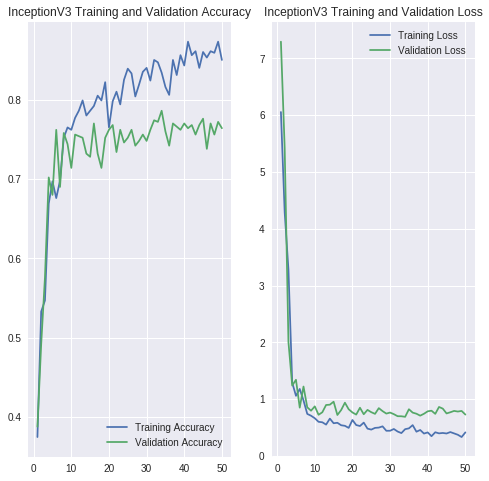

In [18]:
 plt_acc(history, pfx = 'InceptionV3')

Difference between ResNet50 and InceptionV3

* Training speeds are roughly the same.
  * InceptionV3 will probably be faster given its design if we were using a larger data set. 
  * InceptionV3 uses higher dimensional represetation and spatial aggregation for better training and learning speeds. 
* InceptionV3 converges faster and has less volatility in the accuracy between each epoch. 
  * This is likey due to the use of auxilary classifiers in Inception V3. Auxillary classifiers allow for faster convergence and more stable learning. 
* Accuracy of InceptionV3 is higher
* There is a bigger difference in the training set and validation set accuracy of IncpetionV3 than for RetNet50
  * this is likely because InceptionV3 is overfitting more than ResNet50, there for the validation accuracay does not improve with each iteration. 
  


# Part 2 
1. Collect a dataset of at least three landmarks. Your dataset should include at least 100 images of each in train, 50 in validation, and 25 in test (using more images is fine). You can randomly shuffle your dataset to create these splits.

2. Write a model to classify your dataset using transfer learning. Run an experiment and report your results. What do you find?
   
3. Next, how small of a model (in terms of the number of parameters) can you write to classify these images reasonably well? Explore the available

For part 1, it was difficult  for me to get on campus so I used 3 objects in my room. A hot air balloon figure, a perfume bottle and a plant. The images are on google drive, link [here](https://drive.google.com/drive/folders/1E0uuxk4d-3aBC5XCmeNLovmS7Xp7QAlJ?usp=sharing)

In [0]:
base_dir = '/content/drive/My Drive/hw2_images/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [32]:
train_dir 

'/content/drive/My Drive/hw2_images/train'

In [35]:
CLASS_MODE = 'categorical'

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)


Found 309 images belonging to 3 classes.
Found 152 images belonging to 3 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

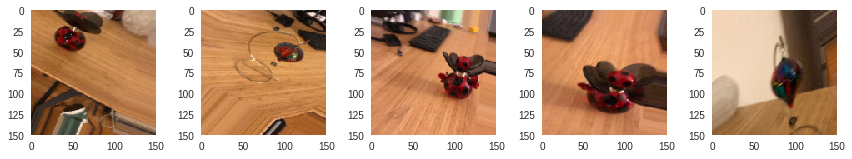

In [46]:
plotImages(sample_training_images[:5])

In [43]:
conv_base = applications.VGG16(weights='imagenet',include_top=False, 
                               input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(3, activation='softmax'))

conv_base.trainable = False

model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(200.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(125.0 / float(BATCH_SIZE)))
)

Epoch 1/50
10/10 [==============================] - 155s 15s/step - loss: 1.7602 - acc: 0.6440 - val_loss: 0.0827 - val_acc: 0.9605
Epoch 2/50
10/10 [==============================] - 58s 6s/step - loss: 0.2165 - acc: 0.9094 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 3/50
10/10 [==============================] - 84s 8s/step - loss: 0.0980 - acc: 0.9709 - val_loss: 0.0089 - val_acc: 1.0000
Epoch 4/50
10/10 [==============================] - 84s 8s/step - loss: 0.0380 - acc: 0.9903 - val_loss: 0.0223 - val_acc: 0.9803
Epoch 5/50
10/10 [==============================] - 90s 9s/step - loss: 0.0544 - acc: 0.9773 - val_loss: 0.0176 - val_acc: 0.9934
Epoch 6/50
10/10 [==============================] - 89s 9s/step - loss: 0.0359 - acc: 0.9838 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 7/50
10/10 [==============================] - 85s 8s/step - loss: 0.0355 - acc: 0.9871 - val_loss: 0.0192 - val_acc: 0.9868
Epoch 8/50
10/10 [==============================] - 85s 8s/step - loss: 0.0245 - acc: 0.

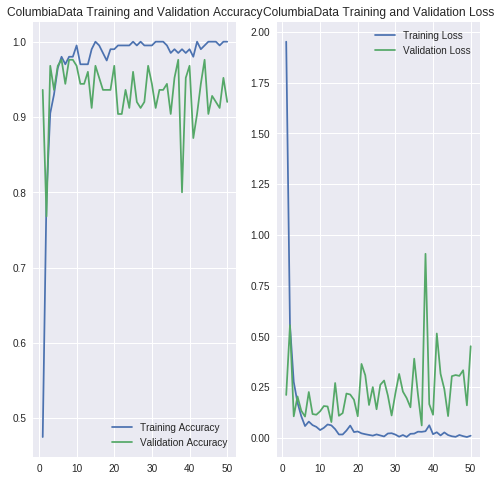

In [27]:
 plt_acc(history, 'ColumbiaData')